## 🔎 Overview dataset

The origiginal [dataset](https://www.kaggle.com/datasets/schran/insurance-premium-prediction) was created to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. The dataset in this competition was generated by a deep learning model trained on the original dataset. Therefore the dataset contains all the columns of the original dataset but the distribution of the features might differ. The features in the dataset are:

* **Age**: age of the insured individual.
* **Gender**: gender of the insured individual.
* **Annual Income**: annual income of the insured individual
* **Marital Status**: Marital status of the insured individual,
* **Number of Dependents**: Number of dependents.
* **Education Level**: Highest education level attained
* **Occupation**: Occupation of the insured individual.
* **Health Score**: A score representing the health status.
* **Location**: Type of location.
* **Policy Type**: Type of insurance policy.
* **Previous Claims**: Number of previous claims made.
* **Vehicle Age**: Age of the vehicle insured.
* **Credit Score**: Credit score of the insured individual.
* **Insurance Duration**: Duration of the insurance policy.
* **Premium Amount**: Target variable representing the insurance premium amount.
* **Policy Start Date**: Start date of the insurance policy.
* **Customer Feedback**: Short feedback comments from customers.
* **Smoking Status**: Smoking status of the insured individual.
* **Exercise Frequency**: Frequency of exercise.
* **Property Type**: Type of property owned.

| date | version| description |
| --- | --- | --- |
20124210 | 14 | only fill missing for categoricals. no encoding for categoricals. |n only fill missing for categoricals. no 
20241213 | 19 | add non-log as feature and adjusted training code to create the non-log dataset | |

## 📊 Datatypes and missings

In [1]:
import joblib
import pandas as pd
import numpy as np
import pathlib
import warnings
import torch

if torch.cuda.is_available():
    device = 'GPU'
else:
    device = 'CPU'

warnings.filterwarnings("ignore")

input_path = pathlib.Path('/kaggle/input/playground-series-s4e12')

train_df = pd.read_csv(input_path / 'train.csv', index_col='id')
train_df.columns = train_df.columns.str.lower().str.split(' ').str.join('_')

test_df = pd.read_csv(input_path / 'test.csv', index_col='id')
test_df.columns = test_df.columns.str.lower().str.split(' ').str.join('_')

sample_submission_df = pd.read_csv(input_path / 'sample_submission.csv')

non_log_oof, non_log_test = joblib.load(
    '/kaggle/input/playground-s4e12-non-log/cat_non_loged.pkl'
)

train_df.shape, test_df.shape, non_log_oof.shape, non_log_test.shape

((1200000, 20), (800000, 19), (1200000,), (800000,))

In [2]:
print(f'Using {device} device.')

Using GPU device.


In [3]:
train_df['non_log_premium_amount'] = non_log_oof
test_df['non_log_premium_amount'] = non_log_test

In [4]:
train_df.head(5)

,age,gender,annual_income,marital_status,number_of_dependents,education_level,occupation,health_score,location,policy_type,...,vehicle_age,credit_score,insurance_duration,policy_start_date,customer_feedback,smoking_status,exercise_frequency,property_type,premium_amount,non_log_premium_amount
id,,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0,1198.816057
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,...,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0,953.272016
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0,1104.083469
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,...,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0,1276.605480
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0,1273.640800


In [5]:
train_df_missing = train_df.isna().sum().to_frame().rename(columns={0: 'n_missing'})
train_df_missing['pct_missing'] = np.round(train_df_missing['n_missing'] / train_df.shape[0], 5)
train_df_missing

,n_missing,pct_missing
age,18705,0.01559
gender,0,0.00000
annual_income,44949,0.03746
marital_status,18529,0.01544
number_of_dependents,109672,0.09139
education_level,0,0.00000
occupation,358075,0.29840
health_score,74076,0.06173
location,0,0.00000
policy_type,0,0.00000


In [6]:
test_df.head(5)

,age,gender,annual_income,marital_status,number_of_dependents,education_level,occupation,health_score,location,policy_type,previous_claims,vehicle_age,credit_score,insurance_duration,policy_start_date,customer_feedback,smoking_status,exercise_frequency,property_type,non_log_premium_amount
id,,,,,,,,,,,,,,,,,,,,
1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House,1280.226711
1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment,1280.627536
1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo,1098.265526
1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House,1080.835132
1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House,1099.509965


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 1200000 to 1999999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     787511 non-null  float64
 1   gender                  800000 non-null  object 
 2   annual_income           770140 non-null  float64
 3   marital_status          787664 non-null  object 
 4   number_of_dependents    726870 non-null  float64
 5   education_level         800000 non-null  object 
 6   occupation              560875 non-null  object 
 7   health_score            750551 non-null  float64
 8   location                800000 non-null  object 
 9   policy_type             800000 non-null  object 
 10  previous_claims         557198 non-null  float64
 11  vehicle_age             799997 non-null  float64
 12  credit_score            708549 non-null  float64
 13  insurance_duration      799998 non-null  float64
 14  policy_start_date 

In [8]:
test_df_missing = test_df.isna().sum().to_frame().rename(columns={0: 'n_missing'})
test_df_missing['pct_missing'] = np.round(test_df_missing['n_missing'] / test_df.shape[0], 5)
test_df_missing

,n_missing,pct_missing
age,12489,0.01561
gender,0,0.00000
annual_income,29860,0.03732
marital_status,12336,0.01542
number_of_dependents,73130,0.09141
education_level,0,0.00000
occupation,239125,0.29891
health_score,49449,0.06181
location,0,0.00000
policy_type,0,0.00000


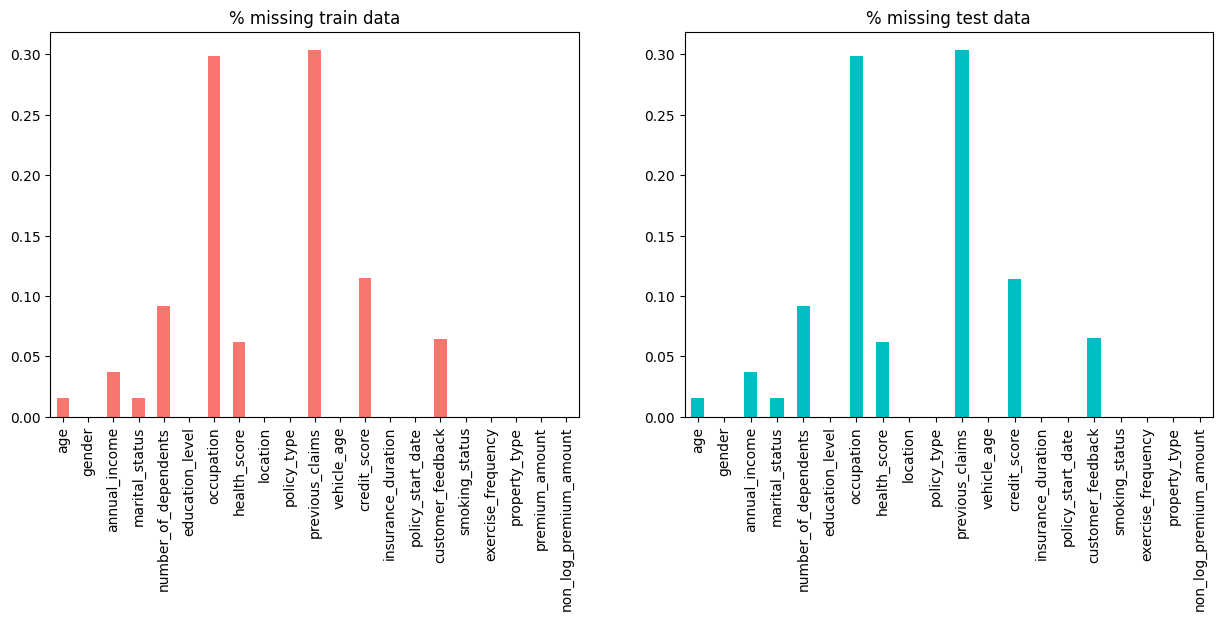

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

color_palette=sns.color_palette(['#f8766d','#00bfc4', '#00b8e7','#00c19a', '#8494ff','#ed68ed'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

train_df_missing['pct_missing'].plot(kind='bar', ax=ax[0], color='#f8766d')
ax[0].set_title('% missing train data')

test_df_missing['pct_missing'].plot(kind='bar', ax=ax[1], color='#00bfc4')
ax[1].set_title('% missing test data')

plt.show()

## 🔠 Categorical features

Lets start this analysis with inspecting the categorical features in the dataset. The goal is the check if there is a statistical significant relationship between the categories and the target 'premium_amount'. A way we can do this is by using a one-way ANOVA test or the Kruskal-Wallis H-test. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. Because the ANOVA has some underlying assumptions we use both to check for a statistical significant relaton between the categorical features and the target. See the Scipy documentation for more information on both tests [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) and [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

In [10]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

test_cat_list = []
test_cat_cols = []

cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.drop('policy_start_date')

for col in cat_cols:
    test_group = train_df.groupby(col)['premium_amount'].apply(list)
    
    f_oneway_result = f_oneway(*test_group)
    kruskal_result = kruskal(*test_group)

    test_cat_list.append(
        [f_oneway_result.statistic, f_oneway_result.pvalue, kruskal_result.statistic, kruskal_result.pvalue]
    )

    test_cat_cols.append(
        col
    )

pd.DataFrame(test_cat_list, index=test_cat_cols, columns=['anova_statistic','anova_pvalue','kruskal_statistic','kruskal_pvalue'])

,anova_statistic,anova_pvalue,kruskal_statistic,kruskal_pvalue
gender,0.031099,0.860021,0.017928,0.893486
marital_status,0.477499,0.620333,1.167640,0.557764
education_level,1.145105,0.329249,3.804265,0.283390
occupation,0.389371,0.677483,6.276566,0.043357
location,0.676414,0.508437,3.429708,0.179990
policy_type,0.470910,0.624434,1.907457,0.385302
customer_feedback,2.624412,0.072483,4.409469,0.110280
smoking_status,0.031783,0.858504,0.169736,0.680346
exercise_frequency,0.483057,0.694050,2.756426,0.430723
property_type,1.051181,0.349525,1.738442,0.419278


Based on the the output of the tests there is only one categorical feature (occupation) for which the H0 hypothesis can be rejected. This means that there is a statistical significant difference between premium amount and someones occupation. Maybe we could put this to our benefit in our feature engineering or modelling process.

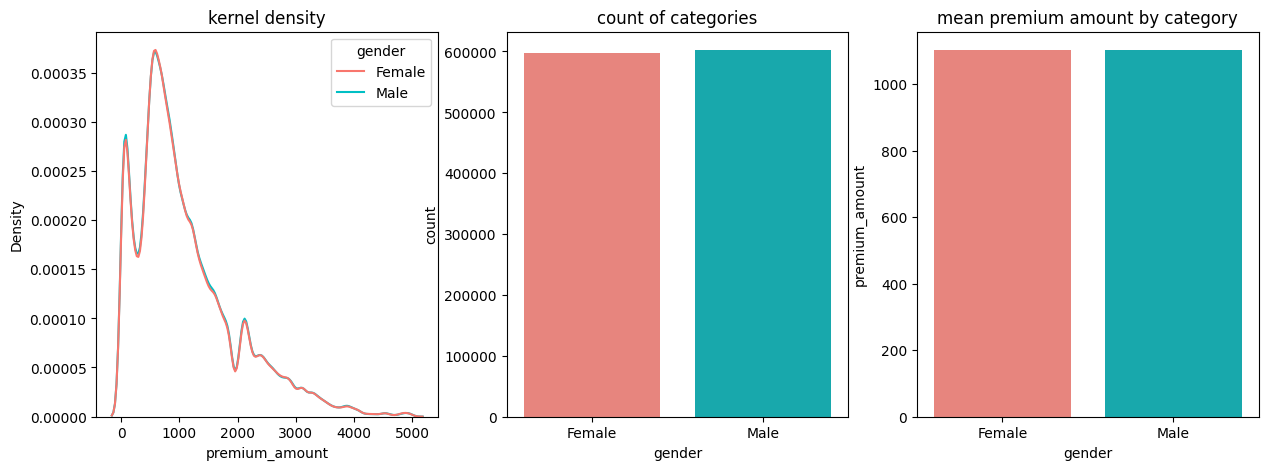

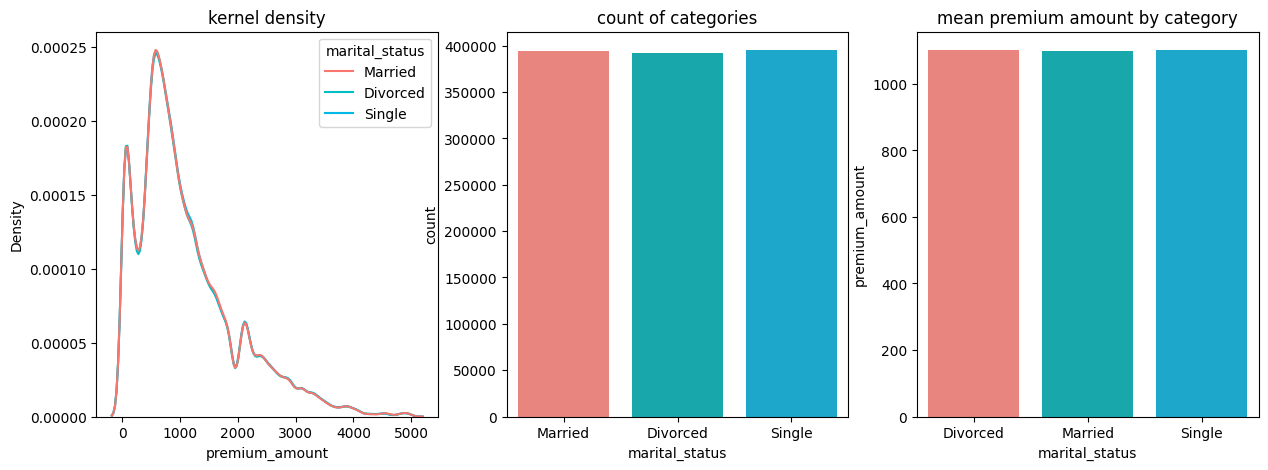

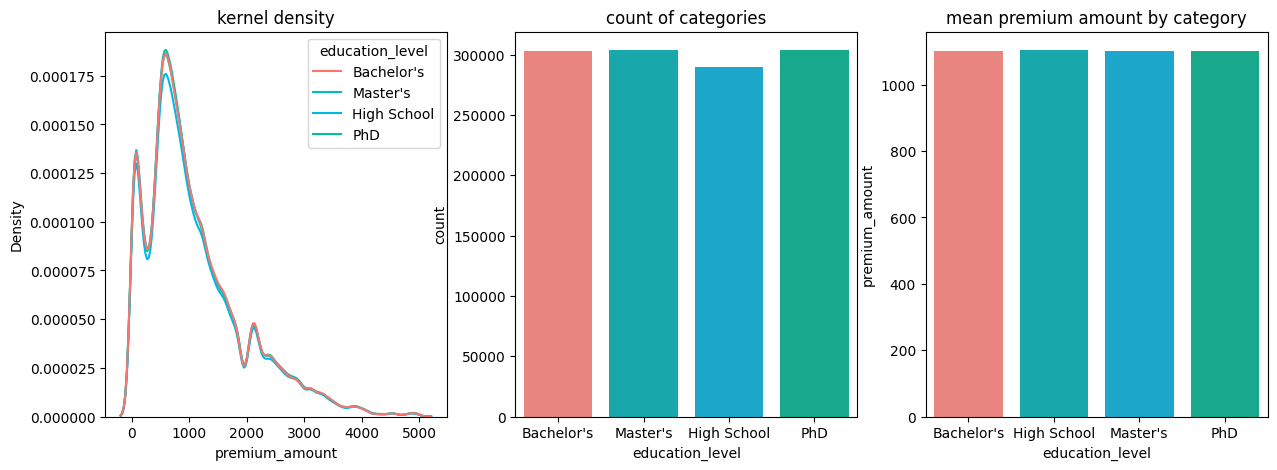

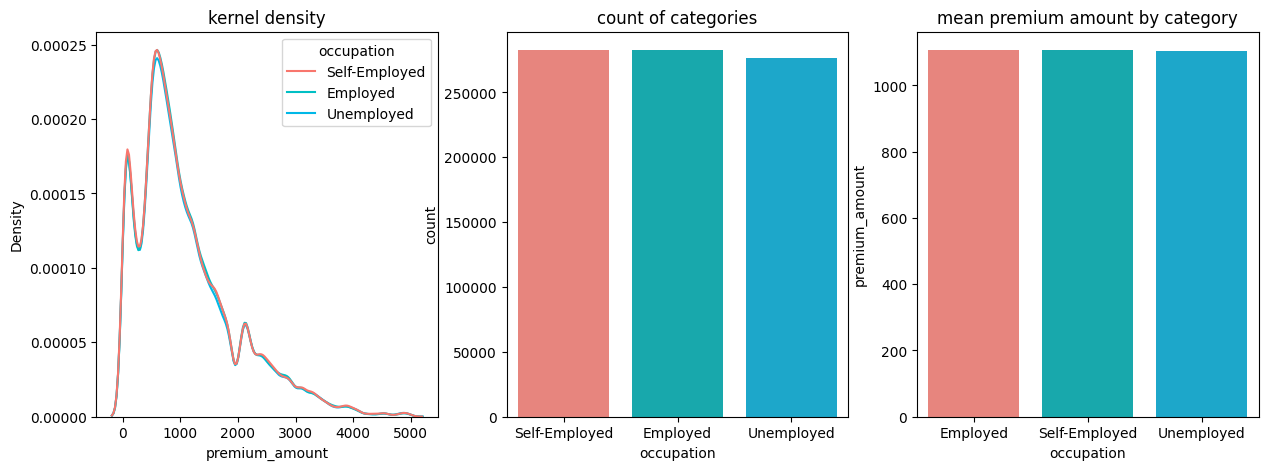

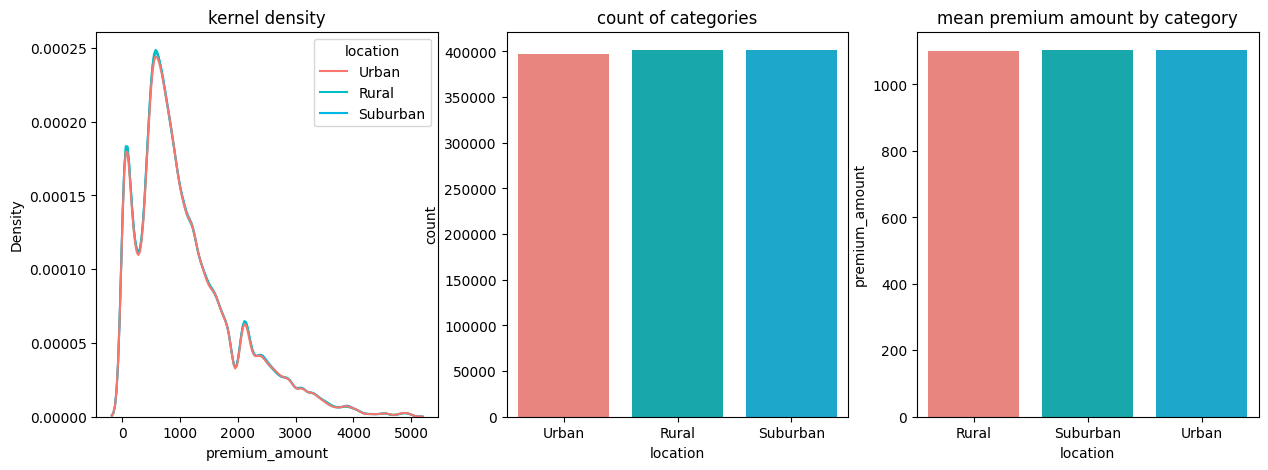

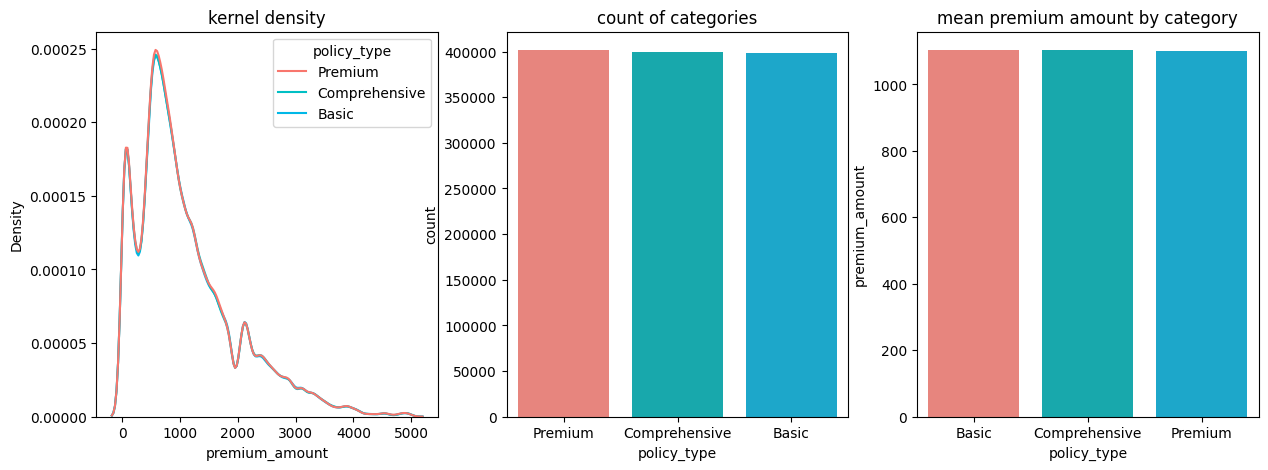

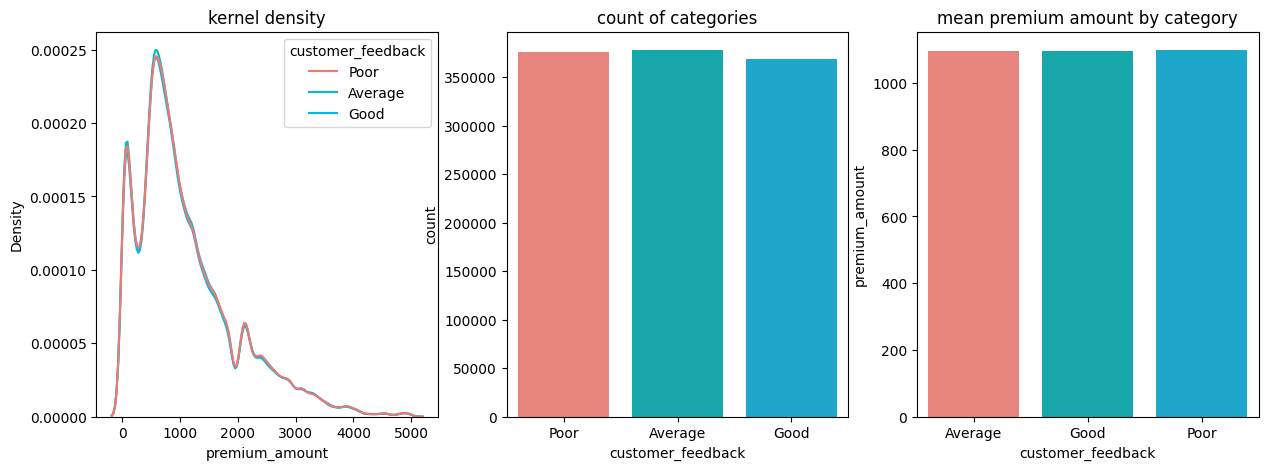

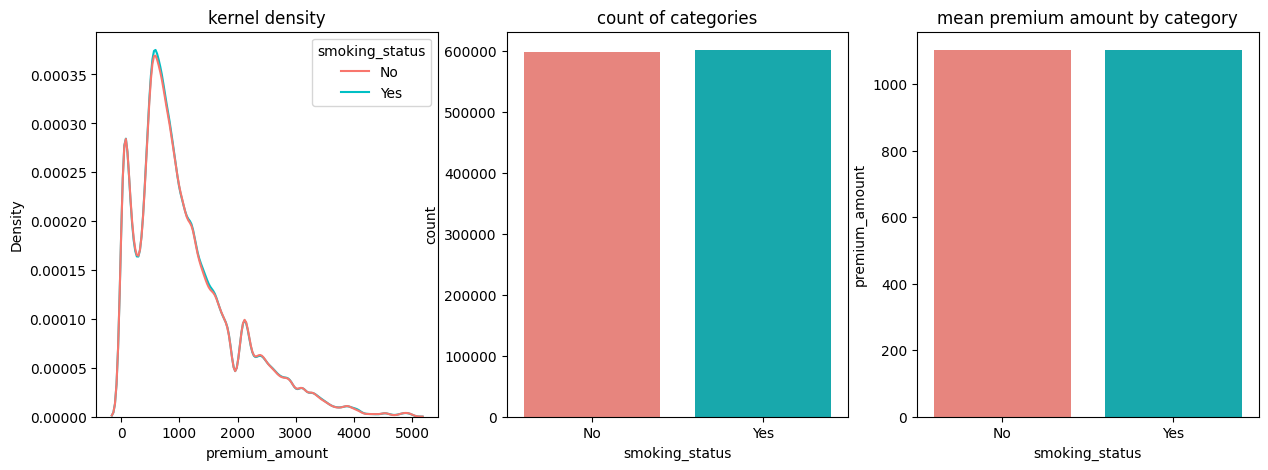

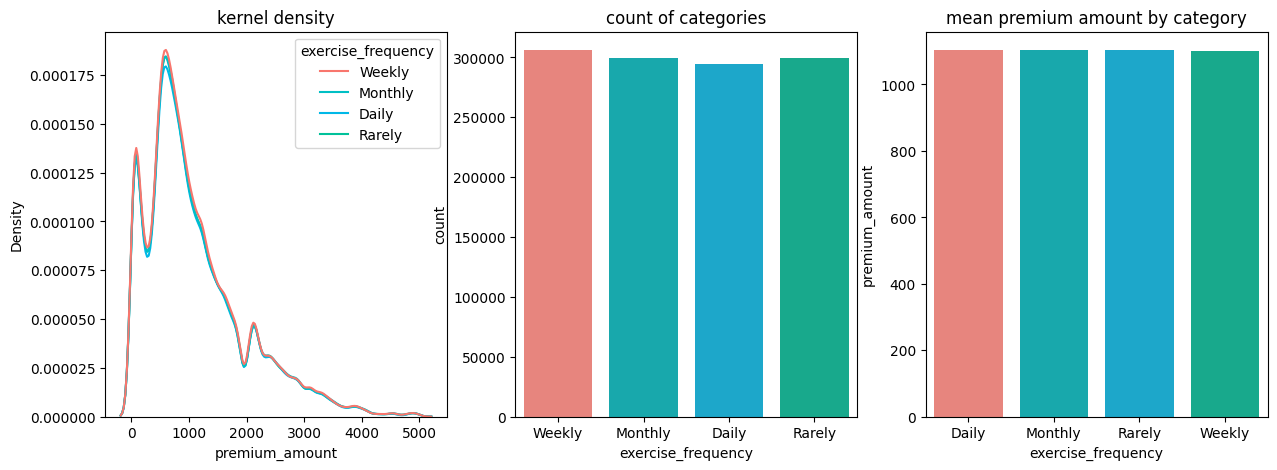

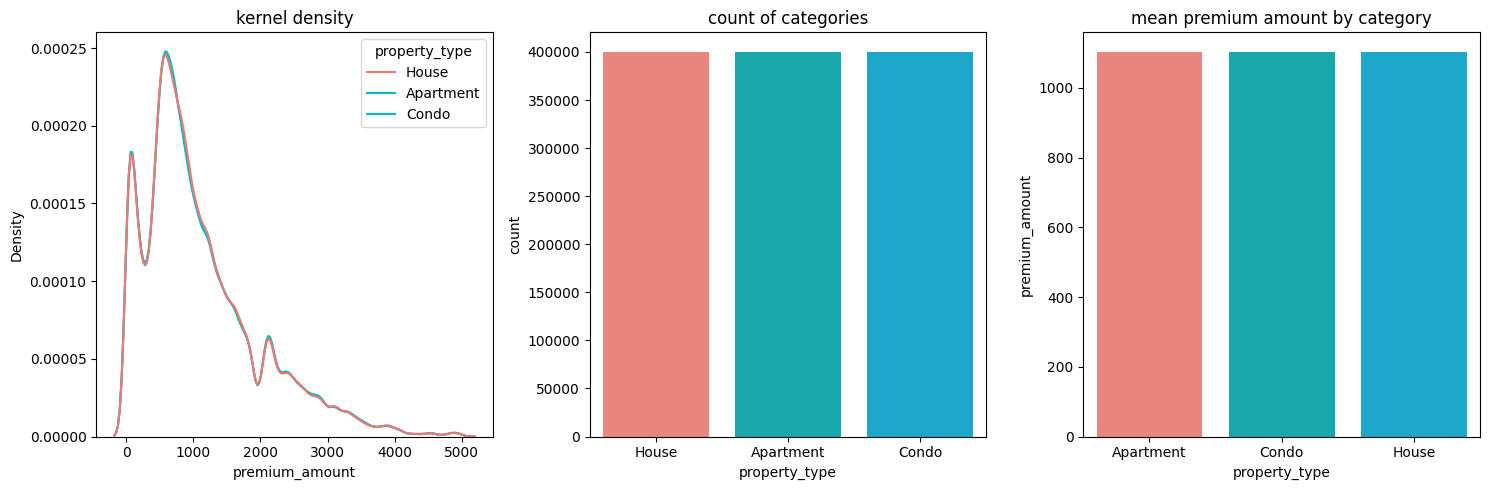

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

n_rows = len(cat_cols)
n_cols = 3

for idx, cat_col in enumerate(cat_cols):
    
    fix, ax = plt.subplots(1, n_cols, figsize=(15,5))

    mean_premium_amount = train_df.groupby(cat_col)['premium_amount'].mean().reset_index()

    sns.kdeplot(
        data=train_df, x='premium_amount', hue=cat_col, ax=ax[0], palette=color_palette
    )
    
    sns.countplot(
        data=train_df, x=cat_col, ax=ax[1], palette=color_palette
    )
    
    sns.barplot(
        data=mean_premium_amount, x=cat_col, y='premium_amount', ax=ax[2], palette=color_palette
    )
    ax[0].set_title('kernel density')
    ax[1].set_title('count of categories')
    ax[2].set_title('mean premium amount by category')

plt.tight_layout()

As the output from the tests already suggested; there isn't really a big difference between the different categorical features. Visual inspection endorsis this.

## 🔢 Numerical features

We continu by inspecting the numerical features in the dataset. We again start by checking if there is a statistical significant relation between the target (premium amount) and each numerical feature in the dataset. This time we can use the Spearman rank-order correlation coefficient. The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases. See the Scipy [documenation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) for more information.

In [12]:
from scipy.stats import spearmanr

test_num_list = []
test_num_cols = []

num_cols = train_df.select_dtypes(include=['int64','float64']).columns.drop('premium_amount')

for num_col in num_cols:

    # Drop NaN manually because param omit_nan is really slow
    correlation, p_value = spearmanr(
        train_df.loc[
            train_df[num_col].notna(), num_col], train_df.loc[train_df[num_col].notna(), 'premium_amount'
        ]
    )

    test_num_list.append([correlation, np.round(p_value, 5)])
    test_num_cols.append(num_col)

pd.DataFrame(test_num_list, index=test_num_cols, columns=['correlation', 'p_value'])

,correlation,p_value
age,-0.002329,0.01137
annual_income,-0.061437,0.00000
number_of_dependents,-0.001610,0.09267
health_score,0.016015,0.00000
previous_claims,0.044549,0.00000
vehicle_age,0.000870,0.34071
credit_score,-0.043928,0.00000
insurance_duration,-0.000071,0.93780
non_log_premium_amount,0.244454,0.00000


The result of test is that there are a couple of numerical features which have a p-value smaller than 0.05. This means that for these features (age, annual income, health score, previous claims and credit score) there is a statistical significant relation between them and the target premium amount. However, the correlation coefficient for these features is so small that it is really hard to find out where the differences are. Therefore we continu or analysis with a visual inspection of each numerical feature.



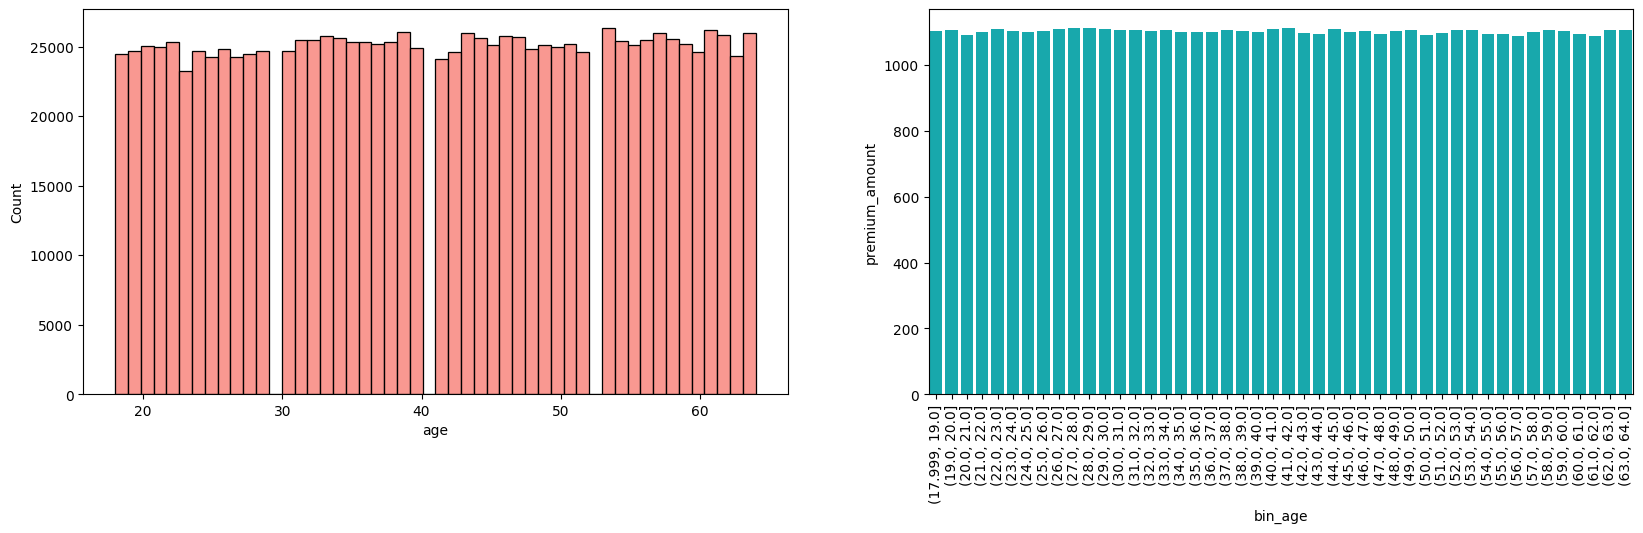

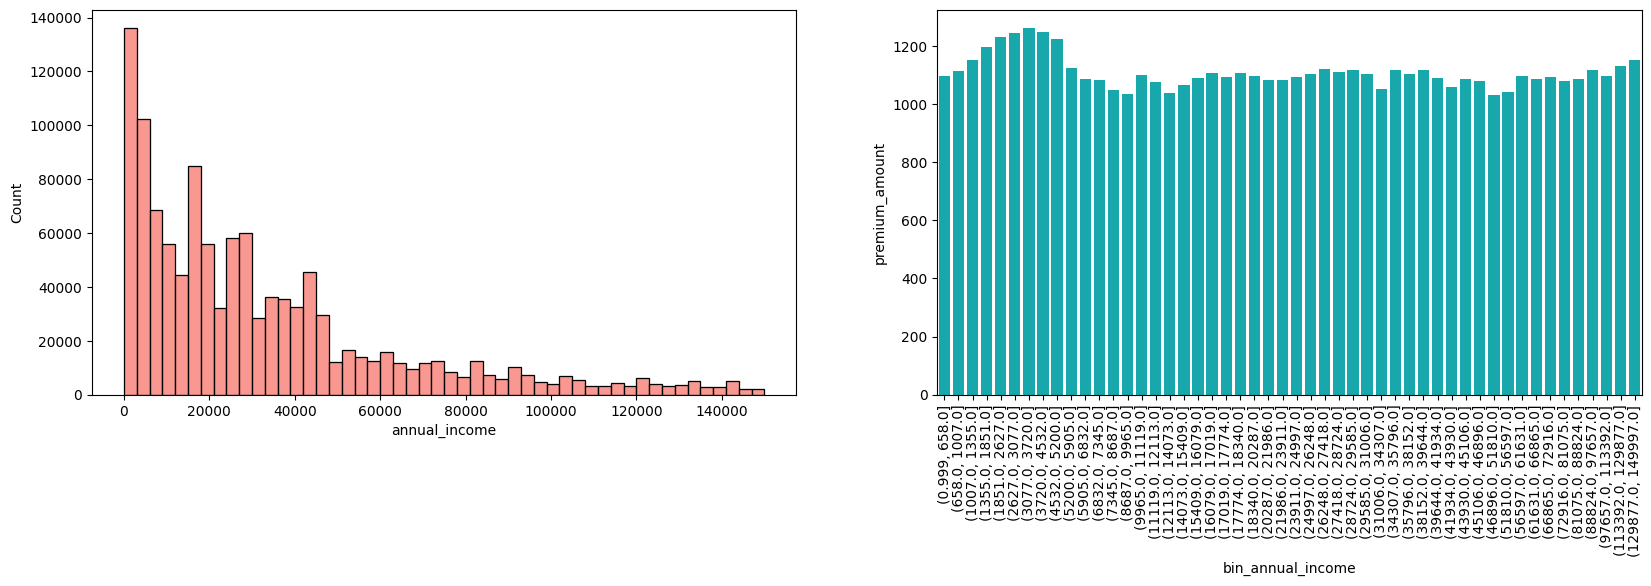

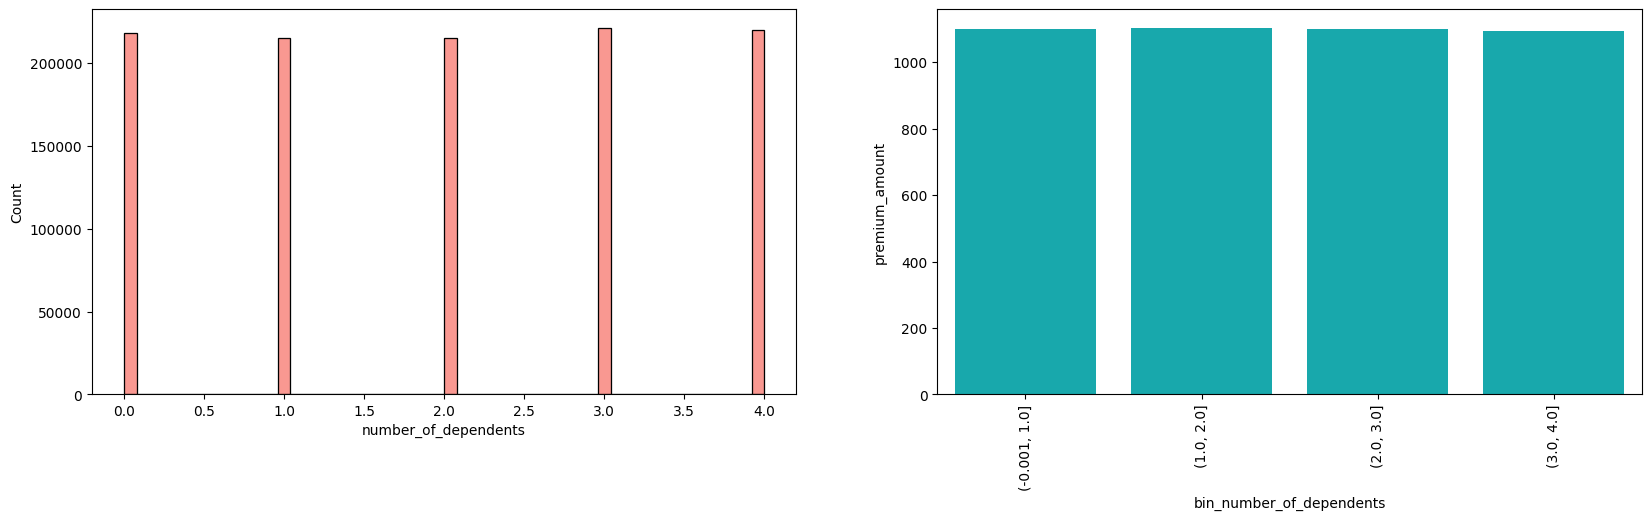

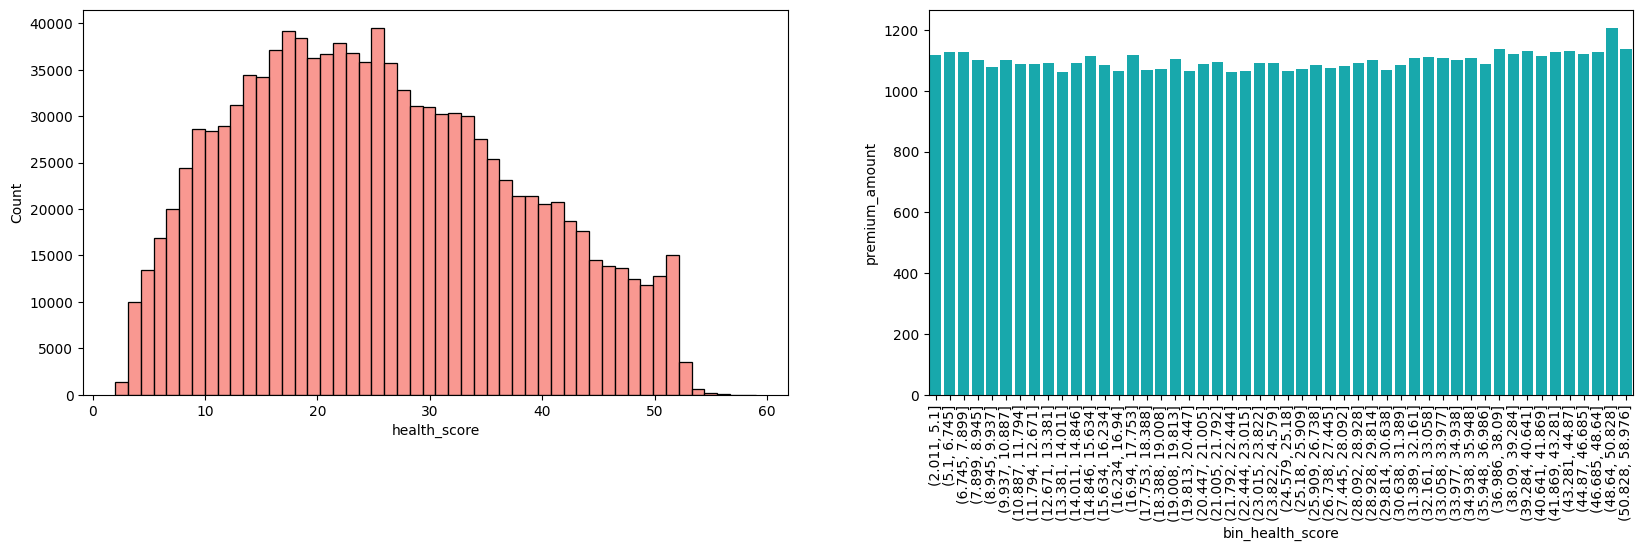

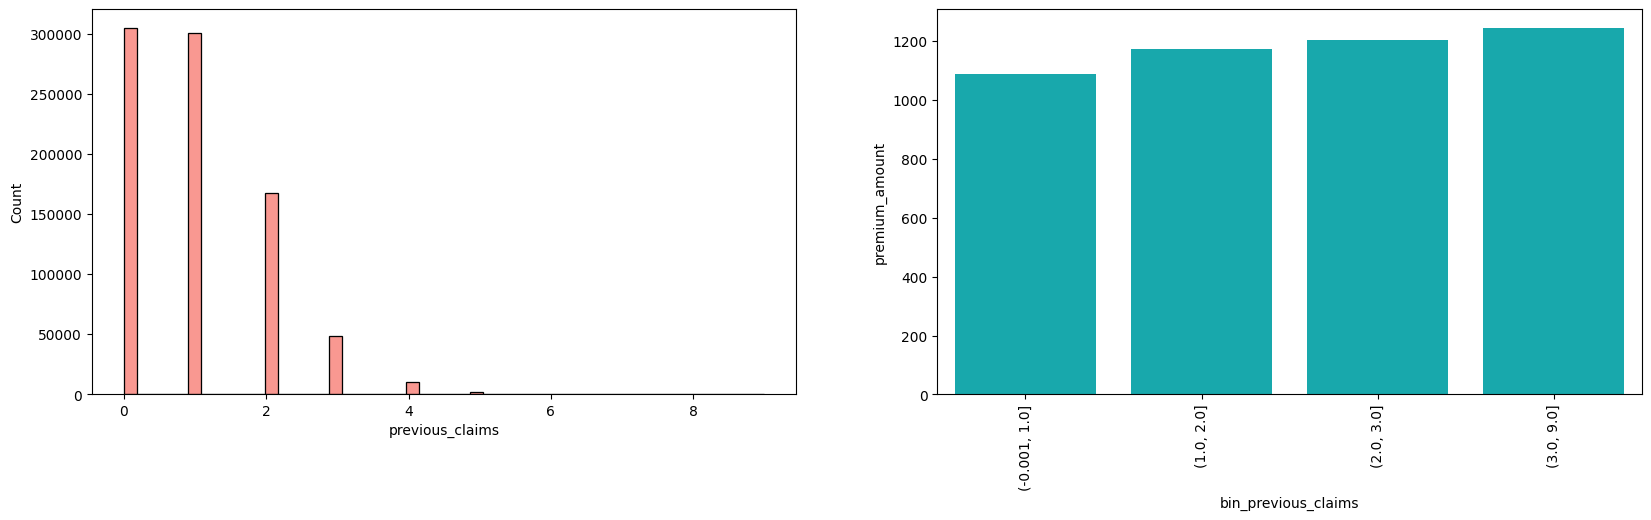

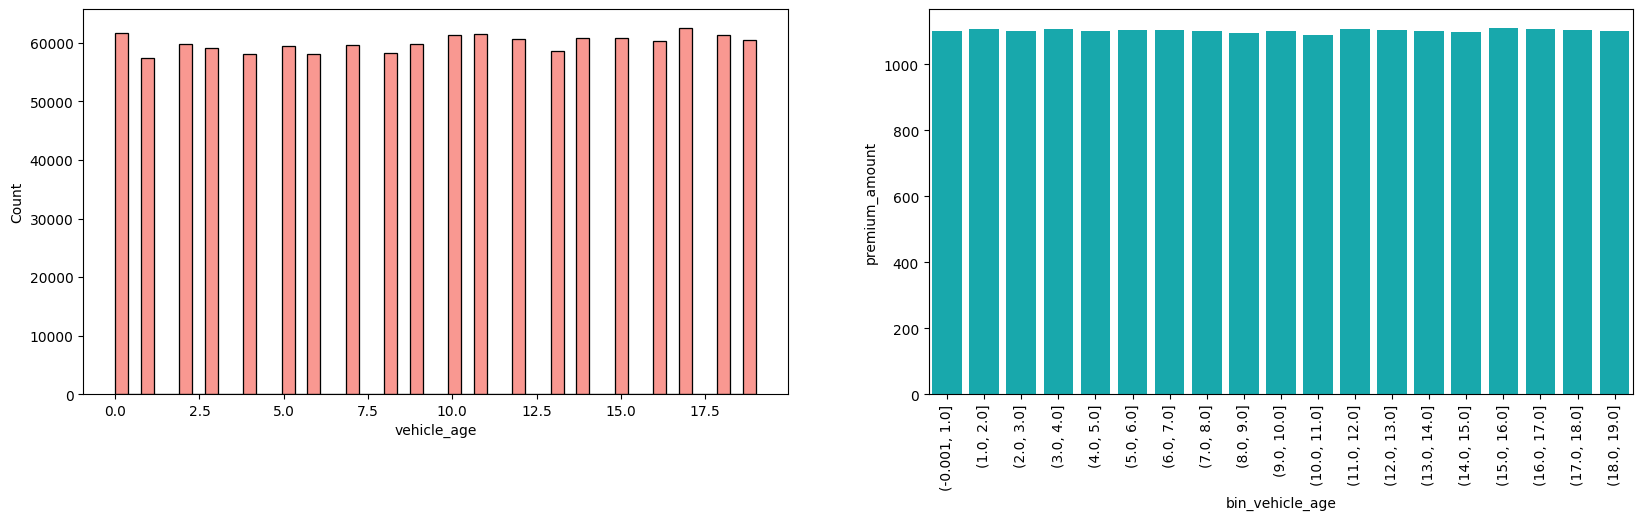

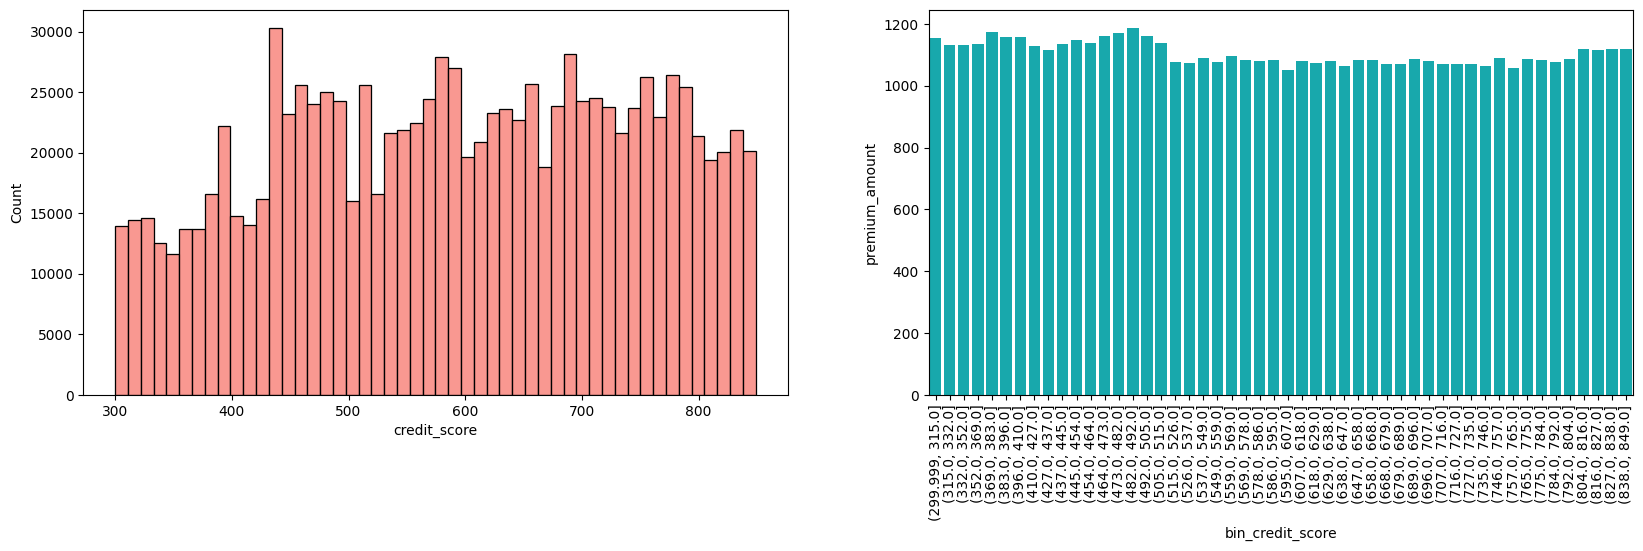

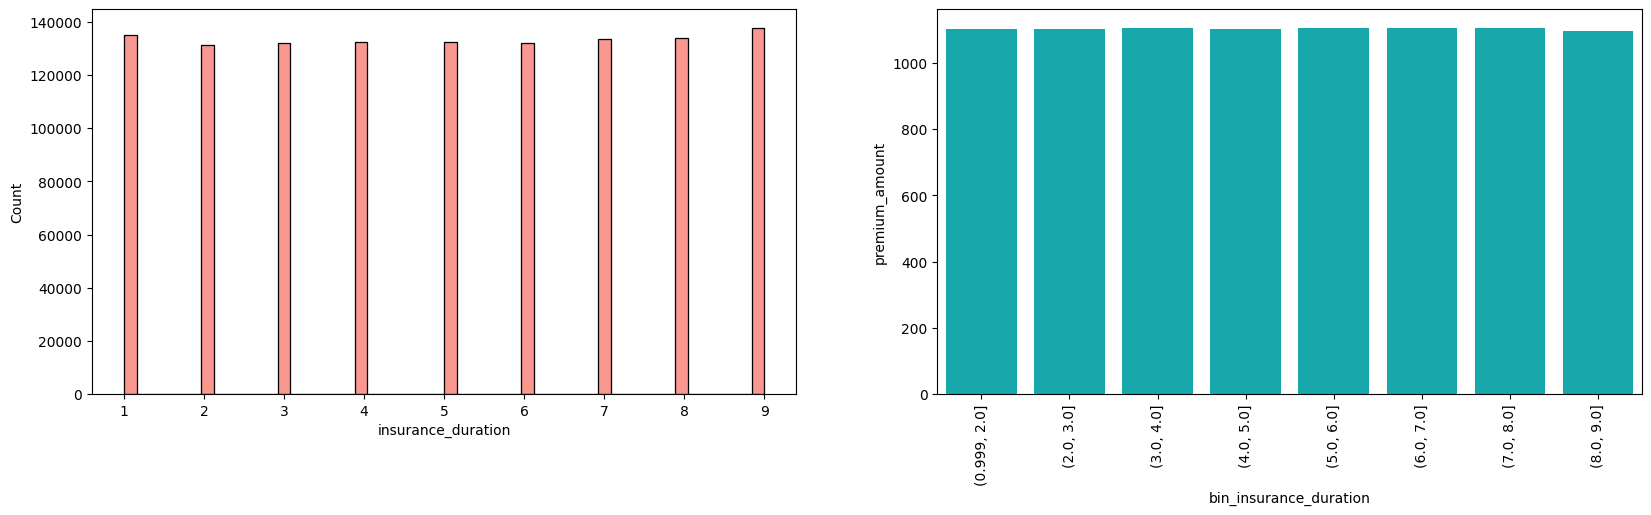

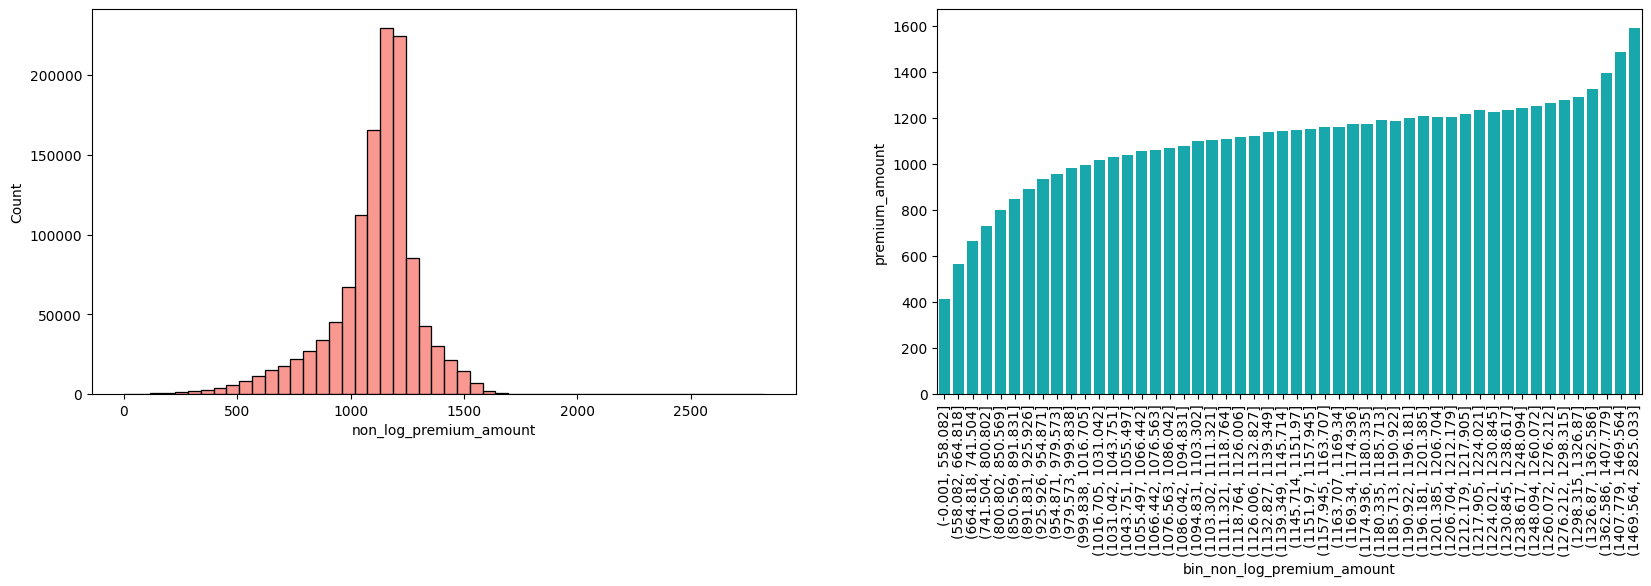

In [13]:
n_rows = len(num_cols)
n_cols = 2

for idx, num_col in enumerate(num_cols):

    plot_num_df = train_df.copy()
    plot_num_df[f'bin_{num_col}'] = pd.qcut(plot_num_df[num_col], q=50, duplicates='drop')
    mean_premium_amount = plot_num_df.groupby(f'bin_{num_col}')['premium_amount'].mean().reset_index()
    
    fig, ax = plt.subplots(1, n_cols, figsize=(20, 5))

    sns.histplot(
        data=train_df, x=num_col, ax=ax[0], bins=50, palette=color_palette, color='#f8766d'
    )

    sns.barplot(
        data=mean_premium_amount, x=f'bin_{num_col}', y='premium_amount', ax=ax[1], color='#00bfc4'
    )

    ax[1].tick_params(axis='x', labelrotation=90)

plt.show()

Visual inspection of the numerical features shows that there are some (again small) differences between each feature and the target premium amount. The most interesting one probably is the (forced by cutting) linear relation between previous claims and premium amount.  

## 🎯 Target

We continu our analysis by inspecting the distribution of the target premium amount. We can see that premium amount is right skewed. Therefore we can try to transform our target to see if we transform it to a (more) normal distribution. To do this we apply a log transformation. As noted in this discussion [thread](https://www.kaggle.com/competitions/playground-series-s4e12/discussion/549336) it could also be helpful in our modeling process.

<Axes: ylabel='Frequency'>

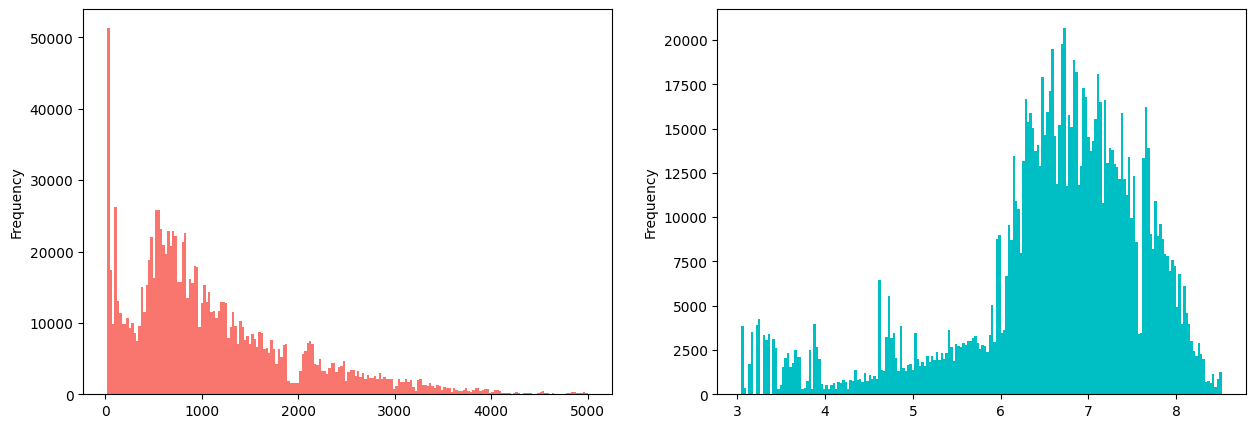

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

train_df['premium_amount'].plot(kind='hist', bins=200, ax=ax[0], color='#f8766d')

np.log1p(train_df['premium_amount']).plot(kind='hist', bins=200, ax=ax[1], color='#00bfc4')

## ⏳ Preprocessing

We start by handling the columns with missing values. The first step will be checking if the columns with missing values are equal in both the training and testing data.

In [15]:
train_missing_cols = set(train_df_missing.loc[train_df_missing.n_missing > 0].index)
test_missing_cols = set(test_df_missing.loc[test_df_missing.n_missing > 0].index)

print(f'Number of columns with missings train minus test: {len(train_missing_cols - test_missing_cols)}')
print(f'Number of columns with missings test minus train: {len(test_missing_cols - train_missing_cols)}')

Number of columns with missings train minus test: 0
Number of columns with missings test minus train: 0


In [16]:
def preprocess_categorical_features(df):
    """
    Preprocess the categorical features by filling in missings.

    Args:
        df: pandas dataframe

    Returns: pandas dataframe with filled missings
    
    """

    df = df.copy()

    df['marital_status'] = df['marital_status'].fillna('Unknown')
    df['occupation'] = df['occupation'].fillna('Unkown')
    df['customer_feedback'] = df['customer_feedback'].fillna('Unknown')

    return df


def preprocess_numerical_features(df):
    """
    Preprocess the numerical features by filling in missings.

    Args:
        df: pandas dataframe

    Returns: pandas dataframe with filled missings
    
    """
    df = df.copy()
    
    df['number_of_dependents'].fillna(df['number_of_dependents'].median(), inplace=True)
    df['age'].fillna(df['age'].median(), inplace=True)
    df['vehicle_age'].fillna(df['vehicle_age'].median(), inplace=True)
    df['previous_claims'].fillna(df['previous_claims'].median(), inplace=True)
    df['annual_income'].fillna(df['annual_income'].median(), inplace=True)
    df['credit_score'].fillna(df['credit_score'].median(), inplace=True)
    df['insurance_duration'].fillna(df['insurance_duration'].median(), inplace=True)
    df['health_score'].fillna(df['health_score'].median(), inplace=True)

    return df
    

In [17]:
# Omit this step for now

# train_df = preprocess_categorical_features(train_df)
# train_df = preprocess_numerical_features(train_df)

# test_df = preprocess_categorical_features(test_df)
# test_df = preprocess_numerical_features(test_df)

In [18]:
print(f'Number of missing in training data: {train_df.isnull().sum().sum()}')
print(f'Number of missing in testing data: {test_df.isnull().sum().sum()}')

Number of missing in training data: 1203748
Number of missing in testing data: 802923


Good! No more missing data in both dataframes 😊

In [19]:
# Lets drop everything before 2020 to see the impact (only for train)
train_df = train_df.loc[pd.to_datetime(train_df.policy_start_date).dt.year >= 2020]
# test_df = test_df.loc[pd.to_datetime(test_df.policy_start_date).dt.year >= 2020]

In [20]:
def get_policy_start_date_features(df):

    feature_cols = [
        'policy_start_date',
        'previous_claims',
        'credit_score',
        'health_score'
    ]

    df = df.copy()[feature_cols]

    df['policy_start_date'] = pd.to_datetime(df['policy_start_date'])
    today = pd.Timestamp.now()

    df['year'] = df['policy_start_date'].dt.year
    df['month'] = df['policy_start_date'].dt.month
    df['day'] = df['policy_start_date'].dt.day
    df['dayofweek'] = df['policy_start_date'].dt.dayofweek
    df['quarter'] = df['policy_start_date'].dt.quarter

    df['policy_age'] = (today - df['policy_start_date']).dt.days
    df['policy_age_month'] = df['policy_age'] // 30
    df['policy_age_years'] = df['policy_age'] // 365

    df['claim_rate'] = df['previous_claims'] / df['policy_age']
    df['combined_risk'] = df['health_score'] + df['credit_score'].fillna(0.0) + df['claim_rate']

    df['n_nan'] = df.isna().sum(axis=1)
    
    df = df.drop(columns=feature_cols)

    return df

In [21]:
train_date_features_df = get_policy_start_date_features(train_df)
test_date_features_df = get_policy_start_date_features(test_df)

In [22]:
date_cols = list(train_date_features_df.columns)

In [23]:
train_df = pd.concat([train_df, train_date_features_df], axis=1).drop(columns=['policy_start_date'])
test_df = pd.concat([test_df, test_date_features_df], axis=1).drop(columns=['policy_start_date'])

In [24]:
train_df.premium_amount

id
0          2869.0
1          1483.0
2           567.0
3           765.0
4          2022.0
            ...  
1199995    1303.0
1199996     821.0
1199997     371.0
1199998     596.0
1199999    2480.0
Name: premium_amount, Length: 1115711, dtype: float64

## 🌐 Modeling

First transform the target by applying a log transformation. We also explore the option to add the prediction on the non-transformed target as a feature. As demonstrated by Backpacker, this approach could give as significant improvent on our leaderboard score while maintaining a steady CV-score accross folds. See his work [here](https://www.kaggle.com/code/backpaker/rid-catboost-nonlog-as-feature). Don't forget to upvote if you also like his work. 👍

In [25]:
combined_df = pd.concat([train_df, test_df], axis=0)

for cat_col in cat_cols:
    freq_encoding = combined_df[cat_col].value_counts().to_dict()

    train_df[f"{cat_col}__freq"] = train_df[cat_col].map(freq_encoding).astype('float')
    test_df[f"{cat_col}__freq"] = test_df[cat_col].map(freq_encoding).astype('float')

In [26]:
X = train_df.drop(columns=['premium_amount'])
y = train_df['premium_amount']
y_log = np.log1p(train_df['premium_amount'])

In [27]:
cat_cols = [c for c in cat_cols]
num_cols = [n for n in num_cols] + [c for c in train_df.columns if '__freq' in c]

In [28]:
X = X[cat_cols + num_cols + date_cols]
test_df = test_df[cat_cols + num_cols + date_cols]

In [29]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [30]:
from category_encoders import CatBoostEncoder, TargetEncoder
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

set_config(transform_output='pandas')

num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('impute_cat', SimpleImputer(strategy='constant', fill_value='Unknown'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols + date_cols),
        ('cat', cat_transformer, cat_cols)
    ], verbose_feature_names_out=False, remainder='passthrough'
)

In [31]:
X = preprocessor.fit_transform(X, y_log)
test_df = preprocessor.transform(test_df)

In [32]:
for cat_col in cat_cols:
    X[cat_col] = X[cat_col].astype('category')
    test_df[cat_col] = test_df[cat_col].astype('category')

Because most of the estimators in the Python modeling ecosystem follow the same implementation pattern we are going to define one training function. This way we can reduce the overhead of duplicating the cross-validation code and reduce the risk of potential errors by only implementing model specific code in the training function.

In [33]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor, early_stopping, log_evaluation, Dataset
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


def train_model(model, X, y, non_log=False):
    """
    Train regression models in a cross-validation loop.

    Args:
        model: regression estimator (one of cb or lgbm)
        X: training features
        y: training target
        non-log: boolean indication whether the target is 
            log-transformed or not.

    Returns:
        models: list of models obtained from a KF training run
        scores: list of scores obtained from a KF training run
    """

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    models = []
    scores = np.zeros(len(X))

    for i, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f'Fold {i + 1}')

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # CatBoostRegressor
        if isinstance(model, CatBoostRegressor):
            model.fit(
                X_train,
                y_train,
                eval_set=(X_val, y_val)
            )

        # LGBMRegressor
        if isinstance(model, LGBMRegressor):
            model.fit(
                X_train,
                y_train,
                eval_set=(X_val, y_val)
            )

        if isinstance(model, XGBRegressor):
            model.fit(
                X_train,
                y_train,
                eval_set=[(X_val, y_val)],
                verbose=0
            )

        models.append(model)
        
        y_pred = model.predict(X_val)
        scores[val_idx] = np.maximum(0, y_pred)

        if non_log:
            score = rmsle(y_val, scores[val_idx])
        else:
            score = rmsle(np.expm1(y_val), np.expm1(scores[val_idx]))

        print(f'=== Fold {i + 1} RSMLE Score {score} ===')

    return models, scores

### CatBoost

In [34]:
# Parameters obtained after hyperparameter tuning
catboost_params = {
    'iterations': 754,
    'learning_rate': 0.02305535125965052,
    'depth': 10,
    'l2_leaf_reg': 1.171945061015989,
    'bagging_temperature': 0.06625187054378748,
    'random_strength': 0.29495752525094404,
    'min_data_in_leaf': 52,
    'border_count': 250,
    'verbose': 200,
    'task_type': device,
    'random_seed': 42,
    'cat_features': cat_cols,
    'eval_metric': 'RMSE'
}

cb_model = CatBoostRegressor(**catboost_params)

cb_models, cb_scores = train_model(
    model=cb_model,
    X=X,
    y=y_log,
    non_log=False
)

print(f'Mean score accross all folds: {rmsle(y, np.expm1(cb_scores))}')

Fold 1
0:	learn: 1.0911454	test: 1.0908825	best: 1.0908825 (0)	total: 6.07s	remaining: 1h 16m 10s
200:	learn: 1.0265306	test: 1.0276279	best: 1.0276279 (200)	total: 26.1s	remaining: 1m 11s
400:	learn: 1.0222154	test: 1.0271476	best: 1.0271460 (384)	total: 46.4s	remaining: 40.9s
600:	learn: 1.0182660	test: 1.0271022	best: 1.0270945 (591)	total: 1m 6s	remaining: 17s
753:	learn: 1.0152150	test: 1.0270979	best: 1.0270653 (684)	total: 1m 22s	remaining: 0us
bestTest = 1.027065344
bestIteration = 684
Shrink model to first 685 iterations.
=== Fold 1 RSMLE Score 1.0270654597680906 ===
Fold 2
0:	learn: 1.0908493	test: 1.0921036	best: 1.0921036 (0)	total: 101ms	remaining: 1m 16s
200:	learn: 1.0263230	test: 1.0291312	best: 1.0291312 (200)	total: 20.4s	remaining: 56.2s
400:	learn: 1.0224121	test: 1.0285938	best: 1.0285938 (400)	total: 40.7s	remaining: 35.9s
600:	learn: 1.0185786	test: 1.0284984	best: 1.0284935 (589)	total: 1m 1s	remaining: 15.6s
753:	learn: 1.0155206	test: 1.0284794	best: 1.0284640

In [35]:
import optuna
from optuna.samplers import TPESampler

def catboost_objective(trial):
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42) 
    scores = np.zeros(len(X)) 
    
    params = {
        "iterations": trial.suggest_int("iterations", 500, 1000), 
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3), 
        "depth": trial.suggest_int("depth", 4, 10), 
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1, 10), 
        "bagging_temperature": trial.suggest_uniform("bagging_temperature", 0.0, 1.0), 
        "random_strength": trial.suggest_loguniform("random_strength", 0.1, 10.0), 
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0), 
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100), 
        "border_count": trial.suggest_int("border_count", 32, 255), 
        "eval_metric": "RMSE", 
        "cat_features": cat_cols, 
        "random_seed": 42, 
        "task_type": device, 
        "verbose": 0
    } 

    models = []
    overall_score = 0 
    
    for i, (train_idx, val_idx) in enumerate(kf.split(X)):
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y_log.iloc[train_idx], y_log.iloc[val_idx] 
        
        train_pool = Pool(X_train, y_train, cat_features=cat_cols) 
        val_pool = Pool(X_val, y_val, cat_features=cat_cols) 
        
        model = CatBoostRegressor(**params) 
        model.fit(train_pool, eval_set=val_pool) 
        
        models.append(model) 
        
        y_pred = model.predict(X_val) 
        scores[val_idx] = np.maximum(y_pred) 
        
        score = rmsle(np.expm1(y_val), np.expm1(scores[val_idx])) 
        
        overall_score += score 
        
        print(f'=== Fold {i + 1} RMSLE Score: {score:} ===') 
        
    avg_score = overall_score / kf.n_splits 
    print(f"Overall RMSLE: {avg_score}") 
        
    return avg_score 

In [36]:
# study = optuna.create_study(direction='minimize')
# study.optimize(catboost_objective, n_trials=100)
# study.best_params

### LGBM

In [37]:
# Parameters not tuned yet, but basic 
lgbm_params = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 10,
    'num_leaves': 256,
    'reg_lambda': 1.17,
    'reg_alpha': 0.1,
    'categorical_feature': cat_cols,
    'metric': 'rmse',
    'objective': 'regression',
    'random_state': 42,
    'verbosity': 1,
    'device': device.lower(),
    'gpu_platform_id': 0,
    'gpu_device_id': 0
}

lgbm_model = LGBMRegressor(**lgbm_params)

lgbm_models, lgbm_scores = train_model(
    model=lgbm_model,
    X=X,
    y=y_log,
    non_log=False
)

print(f'Mean score accross all folds: {rmsle(y, np.expm1(lgbm_scores))}')

Fold 1
[LightGBM] [Warning] categorical_feature is set=gender,marital_status,education_level,occupation,location,policy_type,customer_feedback,smoking_status,exercise_frequency,property_type, categorical_column=30,31,32,33,34,35,36,37,38,39 will be ignored. Current value: categorical_feature=gender,marital_status,education_level,occupation,location,policy_type,customer_feedback,smoking_status,exercise_frequency,property_type
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2101
[LightGBM] [Info] Number of data points in the train set: 892568, number of used features: 40
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 40 dense feature groups (34.05 MB) transferred to GPU in 0.038155 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 6.588565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [38]:
import optuna

def lgbm_objective(trial):
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42) 
    scores = np.zeros(len(X)) 
    
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 1000),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1, 10),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 5),
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 100),
        "categorical_feature": cat_cols,
        "seed": 42,
        "eval_metric": "rmse",
        "verbose": -1
    }

    models = []
    overall_score = 0 
    
    for i, (train_idx, val_idx) in enumerate(kf.split(X)):
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y_log.iloc[train_idx], y_log.iloc[val_idx] 
        
        model = LGBMRegressor(**params) 
        model.fit(
            X_train,
            y_train,
            eval_set=(X_val, y_val)
        ) 
        
        models.append(model) 
        
        y_pred = model.predict(X_val) 
        scores[val_idx] = np.maximum(0, y_pred) 
        
        score = rmsle(np.expm1(y_val), np.expm1(scores[val_idx])) 
        
        overall_score += score 
        
        print(f'=== Fold {i + 1} RMSLE Score: {score:} ===') 
        
    avg_score = overall_score / kf.n_splits 
    print(f"Overall RMSLE: {avg_score}") 
        
    return avg_score 

In [39]:
# study = optuna.create_study(direction='minimize', sampler=TPESampler())
# study.optimize(lgbm_objective, n_trials=100)
# study.best_params

## XGB

In [40]:
# Parameters not tuned yet, but basic 
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 10,
    'reg_lambda': 1.17,
    'reg_alpha': 0.1,
    'random_state': 42,
    'num_leaves': None,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'device': device.lower(),
    'tree_method': 'gpu_hist' if device.lower() == 'gpu' else 'auto',
    'verbosity': 0,
    'enable_categorical': True,
    'categorical_feature': cat_cols
}

xgb_model = XGBRegressor(**xgb_params)

xgb_models, xgb_scores = train_model(
    model=xgb_model,
    X=X,
    y=y_log,
    non_log=False
)

print(f'Mean score accross all folds: {rmsle(y, np.expm1(xgb_scores))}')

Fold 1
=== Fold 1 RSMLE Score 1.0277340416017111 ===
Fold 2
=== Fold 2 RSMLE Score 1.0292733276798782 ===
Fold 3
=== Fold 3 RSMLE Score 1.0270976534254996 ===
Fold 4
=== Fold 4 RSMLE Score 1.029113482486904 ===
Fold 5
=== Fold 5 RSMLE Score 1.027393766082343 ===
Mean score accross all folds: 1.0281228467310117


## Keras / Ridge

In [41]:
meta_features = np.column_stack((cb_scores, lgbm_scores, xgb_scores))
meta_features.shape

(1115711, 3)

In [42]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping

# def tf_rmse(y_true, y_pred):
#     squared_diff = tf.square(y_true - y_pred)
#     mean_squared_error = tf.reduce_mean(squared_diff)
#     return tf.sqrt(mean_squared_error)

# meta_model = Sequential([
#     Dense(128, activation='relu', input_dim=2),
#     BatchNormalization(),
#     Dropout(0.1),
    
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.1),
    
#     Dense(32, activation='relu'),
#     Dense(1)
# ])

# meta_model.compile(
#     optimizer='adam', loss='mse', metrics=[tf_rmse]
# )

# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import Ridge

meta_model = Ridge(alpha=1.0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

meta_models = []
meta_scores = np.zeros(len(X))

for i, (train_idx, val_idx) in enumerate(kf.split(meta_features)):
    print(f'Fold {i + 1}')

    X_meta_train, X_meta_val = meta_features[train_idx], meta_features[val_idx]
    y_meta_train, y_meta_val = y_log.iloc[train_idx], y_log.iloc[val_idx]

    meta_model.fit(
        X_meta_train, y_meta_train
    )

    # with tf.device('/GPU:0'):
    #     meta_model.fit(
    #         X_meta_train,
    #         y_meta_train,
    #         validation_data=(X_meta_val, y_meta_val),
    #         epochs=1, 
    #         batch_size=32,
    #         callbacks=[early_stopping]
    #     )

    meta_models.append(meta_model)
    
    y_meta_pred = meta_model.predict(X_meta_val).flatten()
    meta_scores[val_idx] = np.maximum(0, y_meta_pred)

    score = rmsle(np.expm1(y_meta_val), np.expm1(meta_scores[val_idx]))

    print(f'=== Fold {i + 1} RSMLE Score {score} ===')

Fold 1
=== Fold 1 RSMLE Score 1.0262769013799073 ===
Fold 2
=== Fold 2 RSMLE Score 1.0277452191964407 ===
Fold 3
=== Fold 3 RSMLE Score 1.0256616470278213 ===
Fold 4
=== Fold 4 RSMLE Score 1.0275754531622938 ===
Fold 5
=== Fold 5 RSMLE Score 1.0259115729575925 ===


In [44]:
print(f'Mean score accross all folds: {rmsle(y, np.expm1(meta_scores))}')

Mean score accross all folds: 1.0266345203869602


## 🔥 Predict

In [45]:
cb_preds = np.zeros(len(test_df))
for cb_model in cb_models:
    cb_preds += np.maximum(0, cb_model.predict(test_df)) / len(cb_models)

In [46]:
lgbm_preds = np.zeros(len(test_df))
for lgbm_model in lgbm_models:
    lgbm_preds += np.maximum(0, lgbm_model.predict(test_df)) / len(lgbm_models)

In [47]:
xgb_preds = np.zeros(len(test_df))
for xgb_model in xgb_models:
    xgb_preds += np.maximum(0, xgb_model.predict(test_df)) / len(xgb_models)

In [48]:
test_pred = np.zeros(len(test_df))
test_pred.shape

(800000,)

In [49]:
test_meta_features = np.column_stack((cb_preds, lgbm_preds, xgb_preds))
test_meta_features.shape

(800000, 3)

In [50]:
for meta_model in meta_models:
    test_pred += np.maximum(0, np.expm1(meta_model.predict(test_meta_features))) / len(meta_models)

test_pred

array([885.33856548, 897.02636052, 817.80297565, ..., 872.55941716,
       931.22636804, 830.11663072])

In [51]:
test_pred.shape

(800000,)

## 🚀 Sumbission

In [52]:
submission_df = pd.DataFrame(test_pred).rename(columns={0:'Premium Amount'})
submission_df.index = test_df.index
submission_df = submission_df.reset_index()

In [53]:
submission_df.to_csv('submission.csv', index = False)
submission_df.head()

,id,Premium Amount
0,1200000,885.338565
1,1200001,897.026361
2,1200002,817.802976
3,1200003,815.008674
4,1200004,798.815071
